In [4]:
# load hitting data
import pandas as pd

df = pd.read_csv('2017-hitting-all-teams.csv')
df.columns = ['Tm', '#Bat', 'BatAge', 'R/G',
              'G', 'PA', 'AB', 'R', 'H',
              '2B', '3B', 'HR', 'RBI', 'SB',
              'CS', 'BB', 'SO', 'BA', 'OBP', 
              'SLG', 'OPS', 'OPS+', 'TB', 
              'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB' ]
print(df.head())

    Tm  #Bat  BatAge   R/G    G    PA    AB    R     H   2B  ...    SLG  \
0  ARI    45    28.3  5.01  162  6224  5525  812  1405  314  ...  0.445   
1  ATL    49    28.7  4.52  162  6216  5584  732  1467  289  ...  0.412   
2  BAL    50    28.6  4.59  162  6140  5650  743  1469  269  ...  0.435   
3  BOS    49    27.3  4.85  162  6338  5669  785  1461  302  ...  0.407   
4  CHC    47    27.1  5.07  162  6283  5496  822  1402  274  ...  0.437   

     OPS  OPS+    TB  GDP  HBP  SH  SF  IBB   LOB  
0  0.774    94  2457  106   54  39  27   44  1118  
1  0.738    92  2303  137   66  59  32   57  1127  
2  0.747    99  2458  138   50  10  37   12  1041  
3  0.736    93  2305  141   53   9  36   48  1134  
4  0.775    99  2403  134   82  48  32   54  1147  

[5 rows x 29 columns]


In [8]:
# visualizing important characteristics
# looking for a linear relationship
import matplotlib.pyplot as plt
import seaborn as sns

# this should make the plots work in Jupyter
%matplotlib inline

sns.set(style='whitegrid', context='notebook')
cols = ['BatAge', 'R/G', 'BA', 'OBP', 
        'SLG', 'OPS', 'OPS+' ]
sns.pairplot(df[cols], size=2.5);
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [6]:
# correlation matrix = a matrix with the Pearson product-moment correlation coefficients
# looking for a correlation close to 1 on a scale of 0 to 1
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

NameError: name 'cols' is not defined

In [7]:
# implementing an ordinary least squares linear regression model
class LinearRegressionGD(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter=n_iter
    
    def fit(self, X, y):
        self.w_= np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/ 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [4]:
# let's look at the Linear Regression
# using BA and OPS, because they have a strong linear relationship
X = df[['BA']].values
y = df['OPS'].values
#y = pd.factorize(df['MEDV'].values)[0].reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() # reshape to 2D array 
lr = LinearRegressionGD()
lr.fit(X_std, y_std)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

NameError: name 'np' is not defined

In [7]:
# for plotting
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

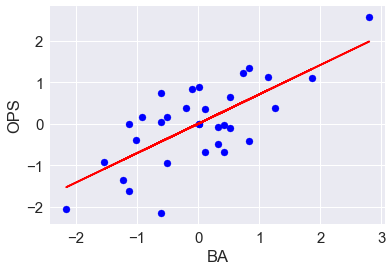

In [8]:
# plot
lin_regplot(X_std, y_std, lr)
plt.xlabel("BA")
plt.ylabel("OPS")
plt.show()

In [9]:
# estimating the coefficient of a regression model
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
print("Slope: %.3f" % slr.coef_[0])
print("Intercept: %.3f" % slr.intercept_)

Slope: 2.118
Intercept: 0.210


In [17]:
# fit a simple linear regression model for comparison
lr = LinearRegression()
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
X_lin_fit = lr.predict(X_fit)

# fit a polynomial regression model on the transformed featres for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_quad_fit = pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_quad_fit))

#plot the results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, X_lin_fit,
         label='linear fit', linestyle='--')
plt.plot(X_quad, y_quad_fit,
         label='quadratic fit')
plt.legend(loc='upper left')
plt.show()


TypeError: float() argument must be a string or a number, not 'LinearRegression'